In [1]:
%matplotlib inline

In [12]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from matplotlib.pyplot import *

features = np.array([[-1, -1],
                     [-2, -1], 
                     [-3, -2], 
                     [1, 1], 
                     [2, 1], 
                     [3, 2]])

labels = np.array([1, 1, 1, 2, 2, 2])

unknown = np.array([[-0.8, -1],
                    [0, 0],
                    [1, -1],
                    [-2, -2],
                    [2, -1],
                    [1, 2],
                    [-1, 1.5]
          ])

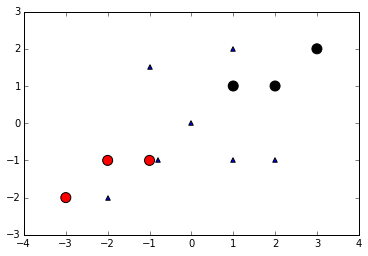

In [16]:
figure()
scatter(features[:,0], features[:,1], cmap='flag', c=labels, s=100)
scatter(unknown[:,0], unknown[:,1], marker='^')
show()

In [17]:
clf = GaussianNB()
clf.fit(features, labels)

GaussianNB()

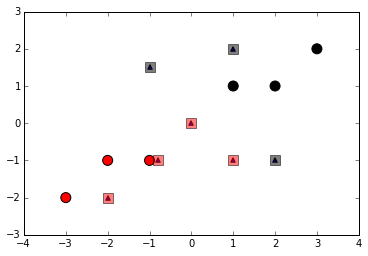

In [19]:
predictions = clf.predict(unknown)

figure()
scatter(features[:,0], features[:,1], cmap='flag', c=labels, s=100)
scatter(unknown[:,0], unknown[:,1], marker='^')
scatter(unknown[:,0], unknown[:,1], marker='s', cmap='flag', c=predictions, s=100, alpha=0.5)
show()

In [21]:
import sklearn

In [22]:
sklearn.__version__

'0.15.2'

In [24]:
def classify(features, labels):
    " given a set of features and labels for them, create a gaussian naive bayes classifier "

    ### import the sklearn module for GaussianNB
    ### create classifier
    ### fit the classifier on the training features and labels
    ### return the fit classifier
    
        
    from sklearn.naive_bayes import GaussianNB
    clf = GaussianNB()
    clf.fit(features, labels)
    return clf

In [23]:
""" Complete the code in ClassifyNB.py with the sklearn
    Naive Bayes classifier to classify the terrain data.
    
    The objective of this exercise is to recreate the decision 
    boundary found in the lesson video, and make a plot that
    visually shows the decision boundary """


from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture, output_image

import numpy as np
import pylab as pl

features_train, labels_train, features_test, labels_test = makeTerrainData()

### the training data (features_train, labels_train) have both "fast" and "slow" points mixed
### in together--separate them so we can give them different colors in the scatterplot,
### and visually identify them
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]

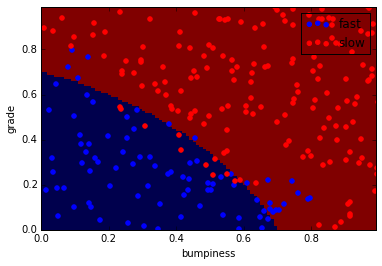

In [25]:
clf = classify(features_train, labels_train)

### draw the decision boundary with the text points overlaid
prettyPicture(clf, features_test, labels_test)
show()

In [34]:
# error rate:
sum(clf.predict(features_test) != labels_test)/(1.0*len(labels_test))

0.11600000000000001

In [36]:
clf.score(features_test, labels_test)

0.88400000000000001

This is the code to accompany the Lesson 1 (Naive Bayes) mini-project 

use a Naive Bayes Classifier to identify emails by their authors
    
authors and labels:

* Sara has label 0
* Chris has label 1

In [64]:
import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess

### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
email_features_train, email_features_test, email_labels_train, email_labels_test = preprocess()

no. of Chris training emails: 7936
no. of Sara training emails: 7884


In [65]:
%%time
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(email_features_train, email_labels_train)

CPU times: user 462 ms, sys: 338 ms, total: 800 ms
Wall time: 800 ms


In [66]:
email_predictions = clf.predict(email_features_test)

In [67]:
email_predictions

array([0, 0, 1, ..., 1, 0, 0])

In [68]:
clf.score(email_features_test, email_labels_test)

0.97383390216154719

In [69]:
entry = email_features_train[0]

In [70]:
len(entry)

3785

In [71]:
len(email_features_train)

15820

In [72]:
email_features_train.shape

(15820, 3785)

In [73]:
h_train = email_features_train.sum(axis=0)

In [74]:
h_train.shape

(3785,)

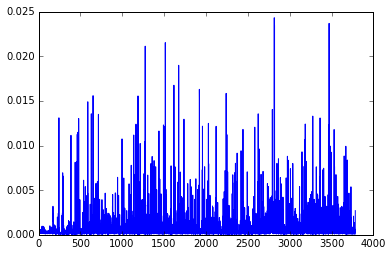

In [75]:
figure()
plot(h_train/email_features_train.shape[0])

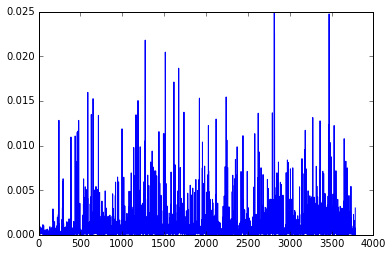

In [76]:
h_test = email_features_test.sum(axis=0)
figure()
plot(h_test/email_features_test.shape[0])

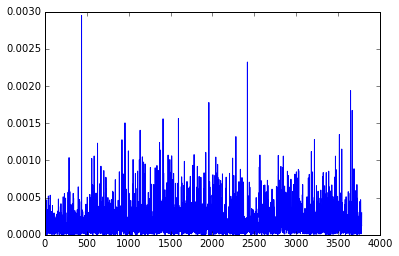

In [77]:
figure()
plot(abs(h_train/email_features_train.shape[0] - h_test/email_features_test.shape[0]))